In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
model.predict(X_test)

array([4.])

In [9]:
y_test

array([4])

In [10]:
insurance = pd.read_csv("./insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


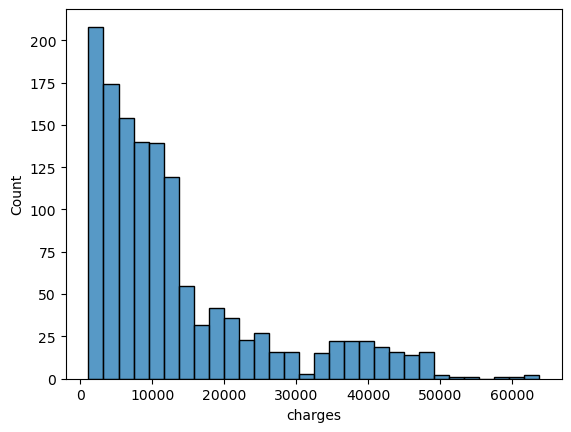

In [11]:
sns.histplot(x="charges", data=insurance)
plt.show()

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
correlation = insurance.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


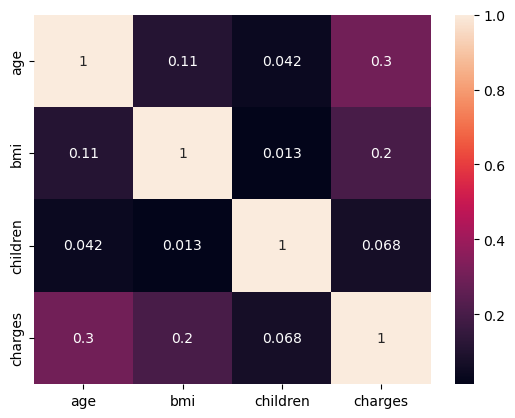

In [16]:
sns.heatmap(correlation, annot=True)
plt.show()

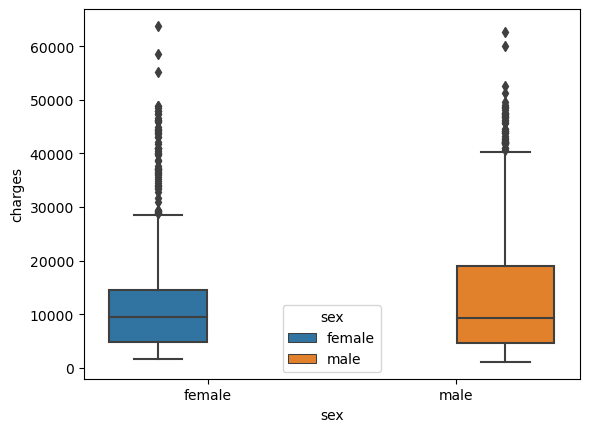

In [18]:
sns.boxplot(x="sex", y="charges", data=insurance, hue="sex")
plt.show()

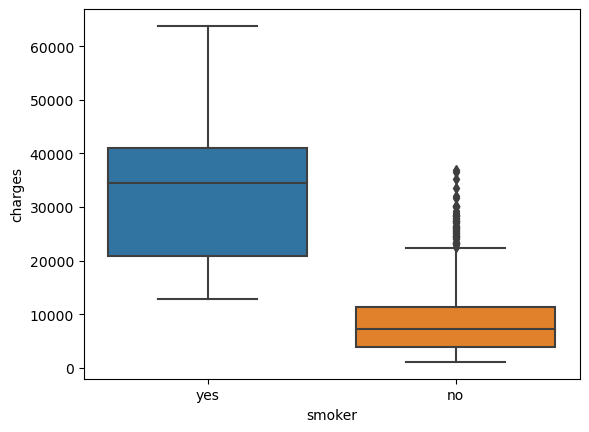

In [19]:
sns.boxplot(x="smoker", y="charges", data=insurance)
plt.show()

In [20]:
mean_smoker = insurance.groupby("smoker")["charges"].mean()
mean_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [22]:
mean_gender = insurance.groupby('sex')["charges"].mean()
mean_gender

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

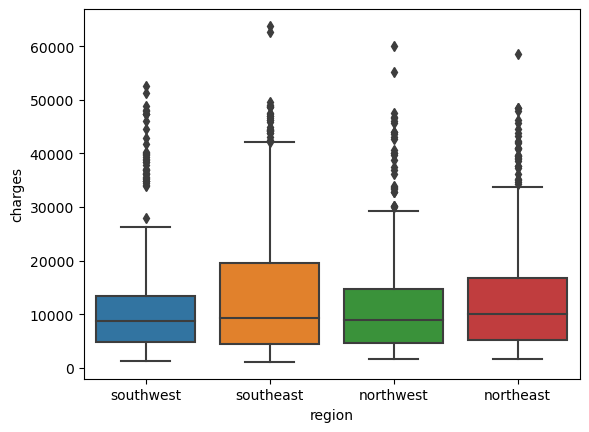

In [23]:
sns.boxplot(x="region", y="charges", data=insurance)
plt.show()

In [26]:
insurance_final = insurance[["age", "bmi", "smoker", "charges"]]
insurance_final

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


In [27]:
encoder = OneHotEncoder(sparse=False, drop="first")
smoker_encoded = encoder.fit_transform(insurance_final["smoker"].values.reshape(-1,1))
smoker_df = pd.DataFrame(smoker_encoded, columns=encoder.get_feature_names_out())
insurance_final["smoker"] = smoker_df
insurance_final

C:\Users\user\AppData\Local\Temp\ipykernel_3608\3363742325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_final["smoker"] = smoker_df


,age,bmi,smoker,charges
0,19,27.900,1.0,16884.92400
1,18,33.770,0.0,1725.55230
2,28,33.000,0.0,4449.46200
3,33,22.705,0.0,21984.47061
4,32,28.880,0.0,3866.85520
...,...,...,...,...
1333,50,30.970,0.0,10600.54830
1334,18,31.920,0.0,2205.98080
1335,18,36.850,0.0,1629.83350
1336,21,25.800,0.0,2007.94500


In [28]:
X = insurance_final.drop('charges', axis=1)
y = insurance_final["charges"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [30]:
X_train.head()

,age,bmi,smoker
1306,29,21.850,1.0
124,47,33.915,0.0
588,61,35.910,0.0
1127,35,35.860,0.0
201,48,32.230,0.0


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

In [33]:
model.coef_

array([  266.10629404,   299.33904434, 23499.67317566])

In [34]:
model.intercept_

-11170.514453590078

In [35]:
# MSE
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
mse

38146209.69205845

In [38]:
mae = mean_absolute_error(y_train, train_predictions)

In [39]:
mae

4274.627905010944

In [42]:
r2 = r2_score(y_train, train_predictions)
r2 = f"{round(r2*100)}%"
r2

'73%'

In [43]:
# On test data
test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
mse_test

32669703.021733683

In [45]:
mae_test = mean_absolute_error(y_test, test_pred)
mae_test

3927.585081398138

In [46]:
mae - mae_test

347.0428236128064

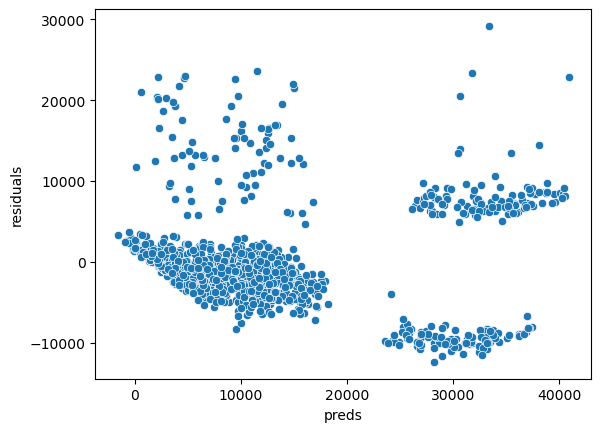

In [47]:
checks = pd.DataFrame()
checks["residuals"] = y_train - train_predictions
checks["preds"] = train_predictions

sns.scatterplot(x="preds", y="residuals", data=checks)
plt.show()

In [48]:
checks["residuals"].mean()

3.770153037115722e-12